## This notebook cantains for the code for <a href="https://amanpreetsingh459.github.io/2018/06/17/blog3-data-preprocessing.html">this</a> blog-post

In [4]:
#import necessary libraries first

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#to show the plots inside notebook itself
%matplotlib inline    

In [8]:
#reading the dataset into a pandas dataframe
dataset = pd.read_csv('data.csv')

In [9]:
#check out few of the rows in data
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP002684,Female,No,0,Not Graduate,No,3400,0,95,360,1,Rural
1,LP001907,Male,Yes,0,Graduate,No,14583,0,436,360,1,Semiurban
2,LP001205,Male,Yes,0,Graduate,No,2500,3796,120,360,1,Urban
3,LP001275,Male,Yes,1,Graduate,No,3988,0,50,240,1,Urban
4,LP002455,Male,Yes,2,Graduate,No,3859,0,96,360,1,Semiurban


Above we can see that there are many fields(columns) to play with.
We will be using ApplicantIncome field to apply data preprocessing.

In [17]:
data = dataset['ApplicantIncome']  #reading the 'ApplicantIncome' column

In [18]:
print("Type of data as loaded: {0}".format(type(data)))    # the data is of the type pandas series

#Let's convert it into the numpy array to work better with the sci-kit learn libraries(yet to come)
data = data.values
print("Type of data after converting: {0}".format(type(data)))    #the type of data has become numpy array

Type of data as loaded: <class 'pandas.core.series.Series'>
Type of data after converting: <class 'numpy.ndarray'>


In [19]:
print(data.shape)   #data is 1D as of now

#Let's make it 2D and convert the indivdual items into float to work better with sci-kit learn libraries(yet to come)
data = np.array(data, ndmin=2, dtype='float64').T
print(data.shape)

(96,)
(96, 1)


Visualizing the data to better understand it and to have a look at the whole

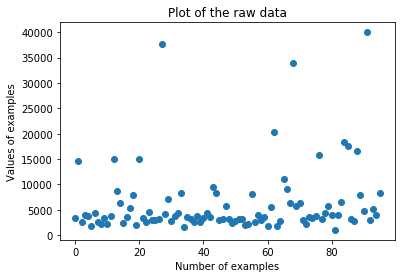

In [20]:
plt.xlabel('Number of examples')
plt.ylabel('Values of examples')
plt.title('Plot of the raw data')
plt.plot(data, marker='o', linestyle='none')
plt.savefig('raw_data.jpeg')
plt.show()

X-Axis is having the total number of the examples, they are around 100 (96). At Y-Axis we can see that the examples' values range between 0 and 40000.

In [22]:
#minimum and the maximum of the values
print("Minimum: {}".format(np.min(data)))
print("Maximum: {}".format(np.max(data)))

Minimum: 1025.0
Maximum: 39999.0


### Scaling the data between 0 and 1

In [24]:
#scaling between 0 and 1
import scipy
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_data = scaler.fit_transform(data)

In [26]:
print("Minimum after rescaling: {}".format(np.min(rescaled_data)))
print("Maximum after rescaling: {}".format(np.max(rescaled_data)))

Minimum after rescaling: 0.0
Maximum after rescaling: 1.0000000000000002


From the above output we can see that the data has been rescaled between 0 and 1. Let's plot its graph too to visualize the entire values at once.

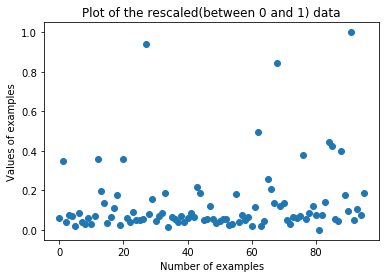

In [27]:
plt.xlabel('Number of examples')
plt.ylabel('Values of examples')
plt.title('Plot of the rescaled(between 0 and 1) data')
plt.plot(rescaled_data, marker='o', linestyle='none')
plt.savefig('rescaled_data.jpeg')
plt.show()

At the Y-Axis we can see that the distribution of data has changed between 0 and 1.

### Standardizing the data (mean 0 and standard deviation 1)

Currently the data has below mean and standard deviation

In [29]:
print("Mean before standardization: {}".format(np.mean(data)))
print("Standard deviation before standardization: {}".format(np.std(data)))

Mean before standardization: 6222.28125
Standard deviation before standardization: 6864.017723339232


Peform standardization

In [30]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
standardized_data = scaler.transform(data)

mean and statndard deviation now

In [32]:
print("Mean after standardization: {}".format(int(np.mean(standardized_data))))
print("Standard deviation after standardization: {}".format(np.std(standardized_data)))

Mean after standardization: 0
Standard deviation after standardization: 1.0


Let's plot its graph to visualize the entire distribution at once.

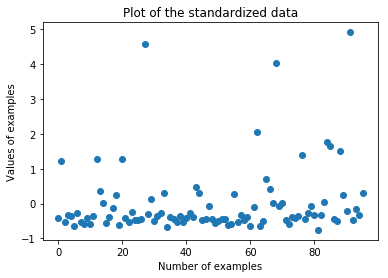

In [33]:
plt.xlabel('Number of examples')
plt.ylabel('Values of examples')
plt.title('Plot of the standardized data')
plt.plot(standardized_data, marker='o', linestyle='none')
plt.savefig('standardized_data.jpeg')
plt.show()

From the above graph at Y-Axis we can see that the data has been rescaled too to the new boundaries(-1 to 5) to make it standardized.

### Normalizing the data (make the length of all the data points(rows)  1)

In [34]:
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(data)
normalized_data = scaler.transform(data)

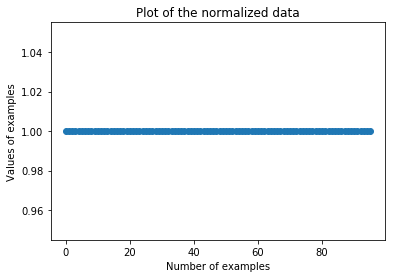

In [35]:
plt.xlabel('Number of examples')
plt.ylabel('Values of examples')
plt.title('Plot of the normalized data')
plt.plot(normalized_data, marker='o', linestyle='none')
plt.savefig('normalized_data.jpeg')
plt.show()